1. stock market predicton -> regression
   - input : 한국 KOSPI + 미국 DJIA 검색
   - output : KOSPI 미래의 1일~1개월간의 종가 예측
   - 기간은 자유
1. loan defaul prediction -> classification
   - input : 검색(알아서) : 안갚는사람
1. credit card fraud detection-> clustering(t-SNE, K-means, DBSCAN)
   - input : 검색(알아서)
   
- 평가항목 : 결과 나오기(통과),
- 옵션 : 성능(score 잘나와야함), 모델검증(교차검증, Grid_Search, EDA :Cross_valid)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kospi_url = 'https://finance.naver.com/sise/sise_index_day.nhn?code=KOSPI'
folder = 'DJIA/'
files = 'DJIA.csv'

In [3]:
# 기본 정보 확인
tables = pd.read_html(kospi_url+'&page='+str('2'))
len(tables)
tables[0].head(3)

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.07.09,2052.03,12.14,-0.59%,433474.0,4361543.0
2,2019.07.08,2064.17,46.42,-2.20%,507760.0,4275766.0


In [4]:
kospis = []
for i in range(1,146):
    tables = pd.read_html(kospi_url+'&page='+str(i))
    kospi = tables[0]
    kospis.append(kospi)
len(kospis)

145

In [5]:
kospi = pd.concat(kospis, axis=0)
kospi.shape

(1885, 6)

In [6]:
djia = pd.read_csv(folder+files)

In [7]:
djia.shape

(890, 7)

In [8]:
kospi.tail(3)

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
10,2015.12.28,1964.06,26.59,-1.34%,389692.0,3753973.0
11,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
kospi = kospi.dropna()

In [10]:
kospi.shape

(870, 6)

In [11]:
djia.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-31,17590.66016,17590.66016,17421.16016,17425.02930,17425.02930,93690000
1,2016-01-04,17405.48047,17405.48047,16957.63086,17148.93945,17148.93945,148060000
2,2016-01-05,17147.50000,17195.83984,17038.60938,17158.66016,17158.66016,105750000


In [12]:
kospi.head(3)

,날짜,체결가,전일비,등락률,거래량(천주),거래대금(백만)
1,2019.07.17,2072.92,18.95,-0.91%,752119.0,4549215.0
2,2019.07.16,2091.87,9.39,+0.45%,674500.0,5158374.0
3,2019.07.15,2082.48,4.18,-0.20%,455075.0,3656611.0


In [13]:
kospi = kospi.set_index('날짜')
djia = djia.set_index('Date')

In [14]:
# 인덱스를 날짜 타입으로 바꾸기
kospi.index = pd.to_datetime(kospi.index)
djia.index = pd.to_datetime(djia.index)

In [15]:
kospi.head(3)

,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2019-07-17,2072.92,18.95,-0.91%,752119.0,4549215.0
2019-07-16,2091.87,9.39,+0.45%,674500.0,5158374.0
2019-07-15,2082.48,4.18,-0.20%,455075.0,3656611.0


In [16]:
djia.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,17590.66016,17590.66016,17421.16016,17425.02930,17425.02930,93690000
2016-01-04,17405.48047,17405.48047,16957.63086,17148.93945,17148.93945,148060000
2016-01-05,17147.50000,17195.83984,17038.60938,17158.66016,17158.66016,105750000


In [17]:
# 통합 :  코스피과 DJIA을 열로 붙이기 
df = pd.concat((kospi, djia), axis=1).dropna()
df.shape

(837, 11)

In [18]:
df.dtypes

체결가          float64
전일비          float64
등락률           object
거래량(천주)      float64
거래대금(백만)     float64
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [19]:
df = df.drop(columns='등락률')

In [20]:
df.describe()  # 데이타의 통계 정보를 보여줌 => 제대로 보여주면 data에 이상 없음.

,체결가,전일비,거래량(천주),거래대금(백만),Open,High,Low,Close,Adj Close,Volume
count,837.000000,837.000000,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837.000000,837.000000,8.370000e+02
mean,2197.623250,12.232915,376723.375149,5.280006e+06,22198.226399,22296.797682,22094.290405,22202.864758,22202.864758,2.679511e+08
std,190.809364,11.749769,114349.240878,1.351745e+06,3233.570652,3252.938195,3214.731143,3233.033070,3233.033070,1.288220e+08
min,1835.280000,0.000000,181312.000000,2.753507e+06,15691.620120,15897.820310,15450.559570,15660.179690,15660.179690,4.589000e+07
25%,2037.100000,3.850000,295960.000000,4.360447e+06,18898.679690,18925.259770,18845.269530,18903.820310,18903.820310,1.535300e+08
50%,2156.260000,8.900000,356210.000000,4.968494e+06,22414.019530,22850.509770,22340.710940,22445.369140,22445.369140,2.796700e+08
75%,2373.140000,16.760000,429445.000000,5.960610e+06,25116.710940,25306.230470,24982.490230,25090.480470,25090.480470,3.395300e+08
max,2598.190000,98.940000,996213.000000,1.170498e+07,27364.689450,27398.679690,27294.169920,27359.160160,27359.160160,9.005100e+08


In [21]:
df.isna().sum().sum()  # 데이타에 null이 몇개 있는지를 확인

0

# 입력 X / 출력 Y 분리
- m개의 x, y 쌍 ( m은 샘플 갯수 )
- x(m, 60, 10)(국내증시컬럼 + DJIA컬럼) -> reshape -> (m, 60 * 10)
- y(m, 30, 2) == (m, 30 * 2)

In [22]:
input_seq = 60  
output_seq = 30
m = len(df) - (input_seq + output_seq) + 1
len(df), m

(837, 748)

In [23]:
# df = df/df.sum() # 그냥 정규화
df = (df - df.min()) / (df.max()-df.min())  # min_max 정규화
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i:i+input_seq]  # 60일씩
    y = df.iloc[i+input_seq:i+input_seq+output_seq][['체결가', 'Close']]
    x_list.append(x.values)     # => x_3d = np.array(x_list)     
    y_list.append(y.values)     # => y_3d = np.array(y_list)    

In [24]:
x_3d = np.array(x_list)
y_3d = np.array(y_list)
x_3d.shape, y_3d.shape

((748, 60, 10), (748, 30, 2))

In [25]:
test_ratio = 0.1
test_m = int(len(x_list) *  test_ratio)
test_m

74

In [26]:
x_2d = np.reshape(x_3d,[m, -1])
y_2d = np.reshape(y_3d,[m, -1])
x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [27]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape

((74, 600), (674, 600), (74, 60), (674, 60))

In [28]:
# 모델 선택, 학습, 가중치를 작게 제약시킨다 > 모든 정보를 활용해서 예측
from sklearn.linear_model import Ridge
model = Ridge(solver='lsqr').fit(x_train, y_train)  # 2차원 이하만 가능 : solver='lsqr' => 절대값을 제곱으로 변경

In [29]:
model.score(x_train, y_train),model.score(x_test, y_test)

(0.9629609147589243, -2.674163486228139)

In [30]:
# 가장 최근 데이터
recent = df.iloc[-input_seq:]
recent = np.reshape(np.array(recent), [1,-1])
recent.shape

(1, 600)

In [31]:
p = model.predict(recent)  # 미래예측
p.shape

(1, 60)

In [32]:
p = np.reshape(p,[output_seq, -1])
p.shape

(30, 2)

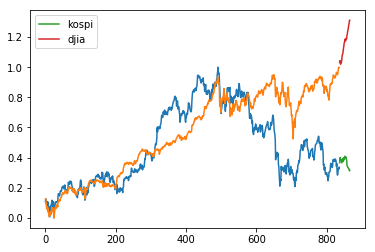

In [33]:
xm = len(df)
plt.plot(np.arange(xm), df['체결가'].values)
plt.plot(np.arange(xm), df['Close'].values)
plt.plot(np.arange(xm,xm+output_seq), p[:,0], label='kospi')
plt.plot(np.arange(xm,xm+output_seq), p[:,1], label='djia')
plt.legend()

- loan defaul prediction -> classification
-input : 검색(알아서) : 안갚는사람

In [34]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [35]:
loan = loans.dropna()
loan.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0


In [36]:
loan.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [37]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [38]:
loan_hot = pd.get_dummies(loan)

In [39]:
from sklearn.neighbors import KNeighborsClassifier  # KNeighborsClassifier => 대문자로 시작 : 클래스.
from sklearn.model_selection import train_test_split

In [40]:
y = loan_hot['not.fully.paid']
X = loan_hot.drop(columns='not.fully.paid')
X.shape, y.shape

((9516, 19), (9516,))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7137, 19), (2379, 19), (7137,), (2379,))

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.score(X_train, y_train),dt.score(X_test, y_test)

(1.0, 0.7335014712063892)

In [44]:
## Score 83%
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)  
rf.score(X_train,y_train), rf.score(X_test, y_test)   # n_estimators=10 => 0.965034965034965   , n_estimators=100 => 실행할 때마다 변경됨.

(1.0, 0.8331231609920134)

In [45]:
#p 122
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
gbc.score(X_train,y_train), gbc.score(X_test,y_test) # 과적합

(0.8551211993834945, 0.8331231609920134)

In [46]:
# p132
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(random_state=0).fit(X_train,y_train)
adc.score(X_train,y_train), adc.score(X_test,y_test) 

(0.8450329270001401, 0.8335435056746532)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.8485357993554715, 0.8179907524169819)

In [48]:
# 모델 선택, 학습  
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.06043144683800783, 0.0635199371482914)

1. credit card fraud detection-> clustering(t-SNE, K-means, DBSCAN)
   - input : 검색(알아서)

In [51]:
creditcard = pd.read_csv('creditcard.csv')
creditcard.shape

(284807, 31)

In [52]:
creditcard.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [53]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [54]:
card = creditcard.drop(columns=['Amount'])

In [55]:
card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [56]:
# 2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn

In [57]:
pca = PCA(n_components=2).fit(card)  # 차원 축소
data_pca = pca.transform(card)
data_pca.shape

(284807, 2)

In [58]:
# k-means로 클러스터링
km = KMeans(n_clusters=2).fit(data_pca)   # 2개로 그룹화
group = km.predict(data_pca)

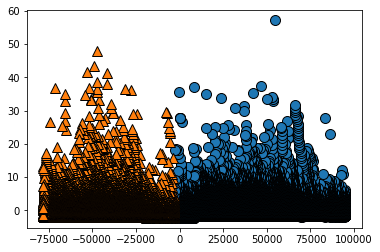

In [59]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], group)  # 예측

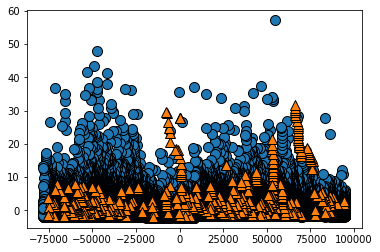

In [60]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], card.iloc[:,-1])  

In [63]:
from sklearn.model_selection import cross_val_score, cross_validate  # 343 예측, 분류, 클러스터 => 모델의 성능에 따라 가산점 90%, 95%
from sklearn.svm import SVC, SVR # 분류, 예측
from sklearn.model_selection import GridSearchCV# score 외의 정보도 출력됩니다.

In [64]:
param_grid = {'C':[10, 50], 'gamma': [0.001, 0.01]}  # Dictinary로 넣음.
grid_serarch = GridSearchCV(SVC(), param_grid)